In [11]:
import pandas as pd
data = pd.read_csv("Mall_Customers(1).csv")


c:\Users\Robson Campos\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


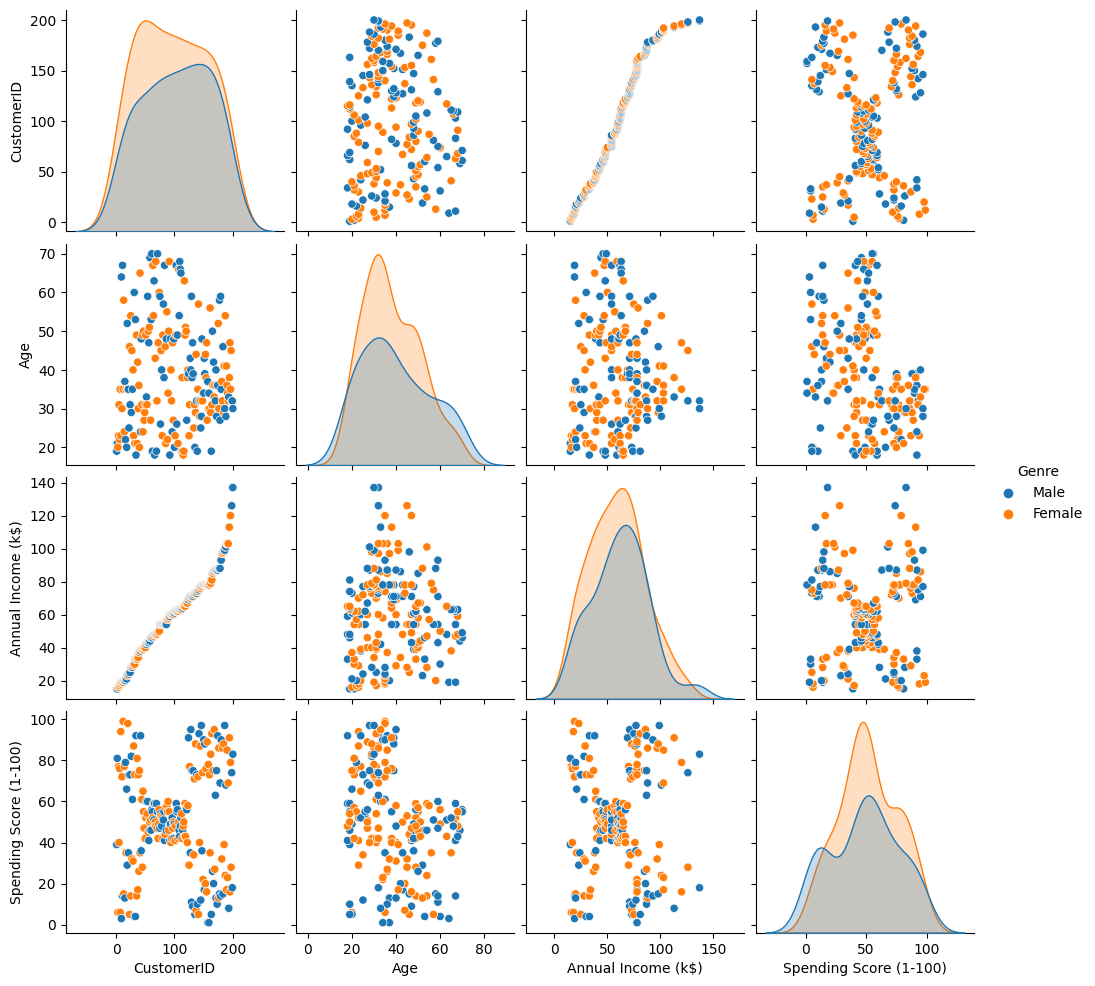

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot do scatterplot em matriz
sns.pairplot(data, hue="Genre")
plt.show()


In [13]:
customer_data = data[["Annual Income (k$)", "Spending Score (1-100)"]]
from sklearn.cluster import KMeans
kmeans_model = KMeans()

c:\Users\Robson Campos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Robson Campos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Robson Campos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Robson Campos\AppData\Local\Programs\Python\Python31

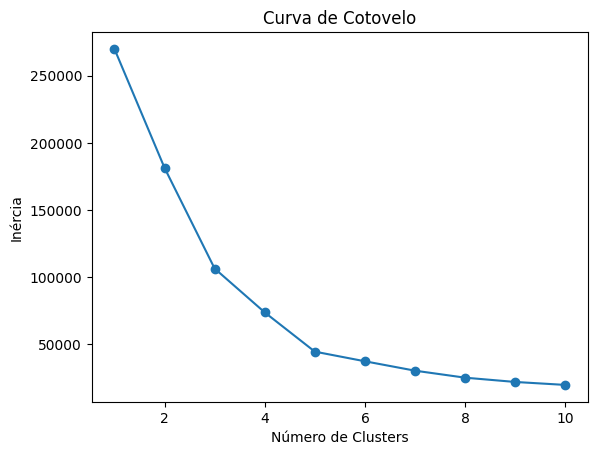

In [16]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(customer_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Curva de Cotovelo')
plt.show()


In [17]:
kmeans_model = KMeans(n_clusters=5, random_state=0)
kmeans_model.fit(customer_data)


c:\Users\Robson Campos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=0)

In [18]:
centroids = kmeans_model.cluster_centers_
print(centroids)


[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


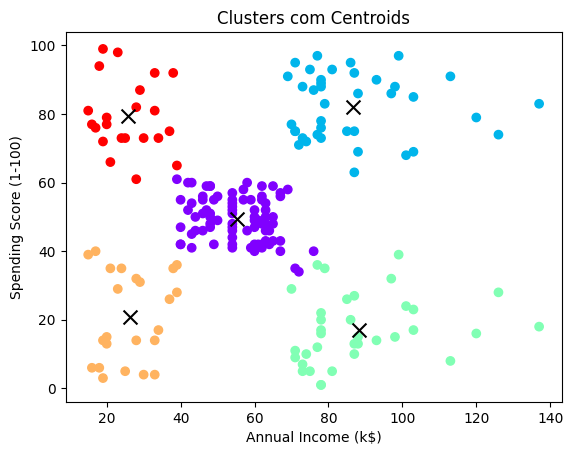

In [19]:
plt.scatter(customer_data["Annual Income (k$)"], customer_data["Spending Score (1-100)"], c=kmeans_model.labels_, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Clusters com Centroids")
plt.show()
